# AOS_PS1_inspect 

In [3]:
from lsst.daf import butler as dafButler
import lsst.afw.cameraGeom.utils as cameraGeomUtils
import lsst.afw.display as afwDisplay
import matplotlib.pyplot as plt
from matplotlib import rcParams 
from astropy.io import fits
from astropy.visualization import ZScaleInterval

import numpy as np 
import os 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

## Show the raw and postISR LSSTComCam simulated data 

In [4]:
def plot_raw_postISR(repo_dir,instrument,detector='R22_S11'):
    
    butler = dafButler.Butler(repo_dir, collections=[f'{instrument}/raw/all',
                                                     f'{instrument}/calib','run1',
                                                     f'{instrument}/calib/unbounded'],
                             )


    # this is just to get the exposure  number
    # so that we don't have  to guess...
    dataId0 = dict(instrument=instrument)
    dataset = next(iter(
                        butler.registry.queryDatasets(
                            datasetType='postISRCCD', 
                            collections=['run1'],
                            dataId=dataId0  )
                        )
                   )
    exp_num = dataset.dataId["exposure"]
    print(exp_num)
    zscale = ZScaleInterval()
     
    # initialize the figure 
    fig,ax = plt.subplots(1,2,figsize=(18,9))

    # get the raw exposure 
    exposure = butler.get('raw', detector=detector, instrument=instrument,
              exposure=exp_num,)

    data = exposure.image.array
    vmin, vmax = zscale.get_limits(data)
    ax[0].imshow(exposure.image.array, vmin=vmin,vmax=vmax,cmap='Greys',
                origin='lower')

    ax[0].set_title("raw")
    ax[0].set_xlabel('x [px]')
    ax[0].set_ylabel('y [px]')

    # get the postISR exposure 
    exposure = butler.get('postISRCCD', detector=detector, instrument=instrument,
              exposure=exp_num,collections=['run1'])

    data = exposure.image.array
    vmin, vmax = zscale.get_limits(data)
    ax[1].imshow(exposure.image.array, vmin=vmin,vmax=vmax,cmap='Greys',
                origin='lower')

    ax[1].set_title("postISR")
    ax[1].set_xlabel('x [px]')
    ax[1].set_ylabel('y [px]')
    fig.suptitle(f"{instrument} {exposure.getDetector().getName()}",
                fontsize=18)


First, show the defocal images:

4021123106002


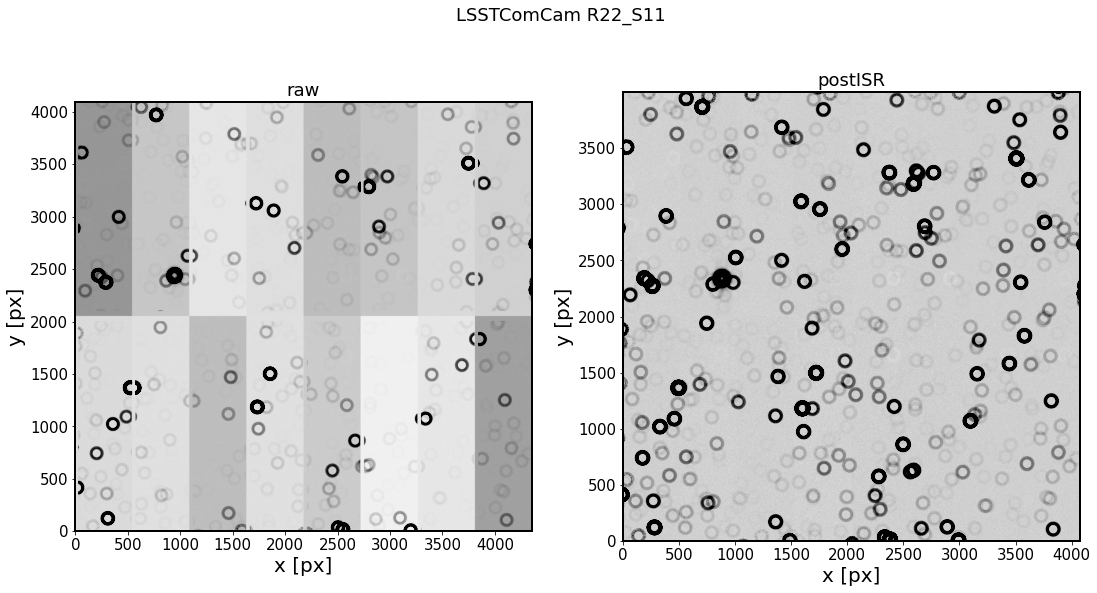

In [5]:
%matplotlib inline

instrument = 'LSSTComCam'
repo_dir = '/project/scichris/aos/ps1_phosim/comCam/med/defocal/DATA/'
plot_raw_postISR(repo_dir,instrument)    
    

(Next: Do the same with the stack tools `camera_geom`)

Show the in-focus  images:

4021123106002


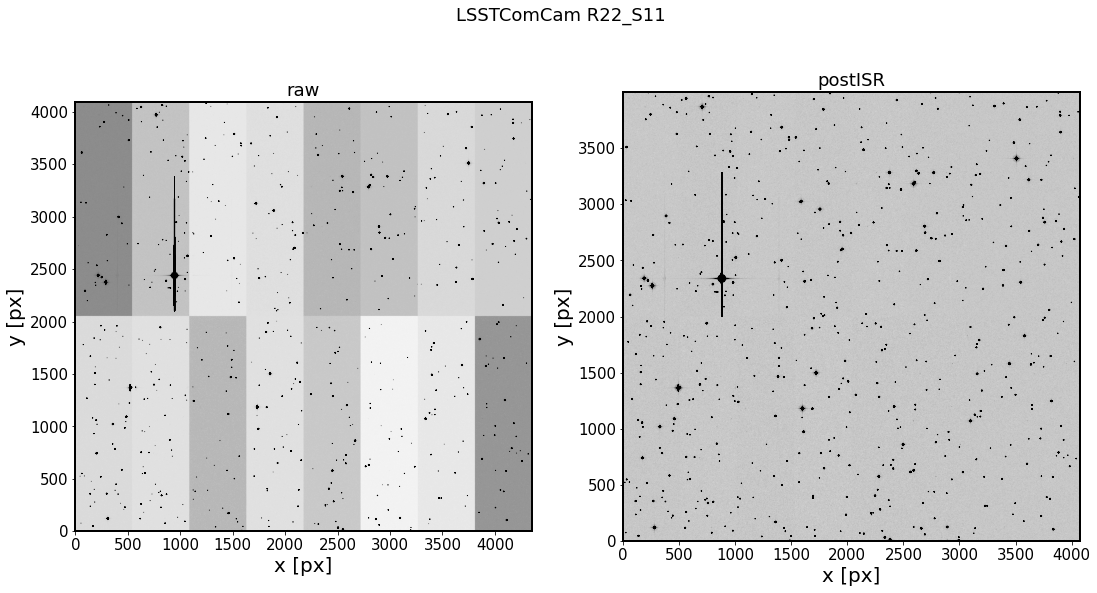

In [6]:
%matplotlib inline

instrument = 'LSSTComCam'
repo_dir = '/project/scichris/aos/ps1_phosim/comCam/med/focal/DATA/'
plot_raw_postISR(repo_dir,instrument)   

4021123106002


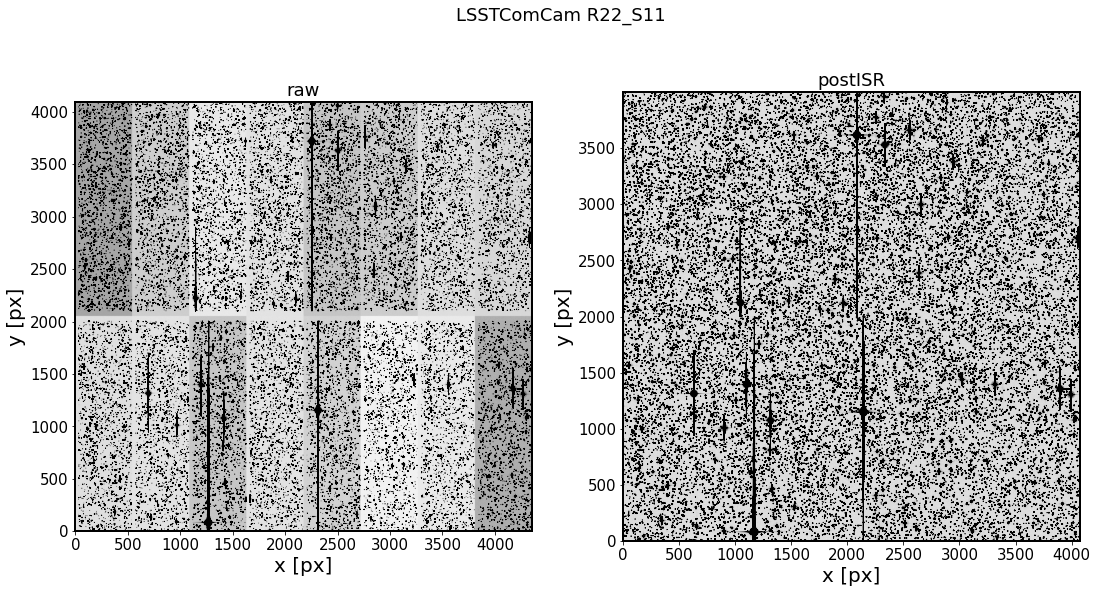

In [29]:
%matplotlib inline

instrument = 'LSSTComCam'
repo_dir = '/project/scichris/aos/ps1_phosim/comCam/low/focal/DATA/'
plot_raw_postISR(repo_dir,instrument)   

4021123106002
952.0 1334.1924179536427
-24.466028 596.2638638176097


Text(0.5, 0.98, 'LSSTComCam R22_S11')

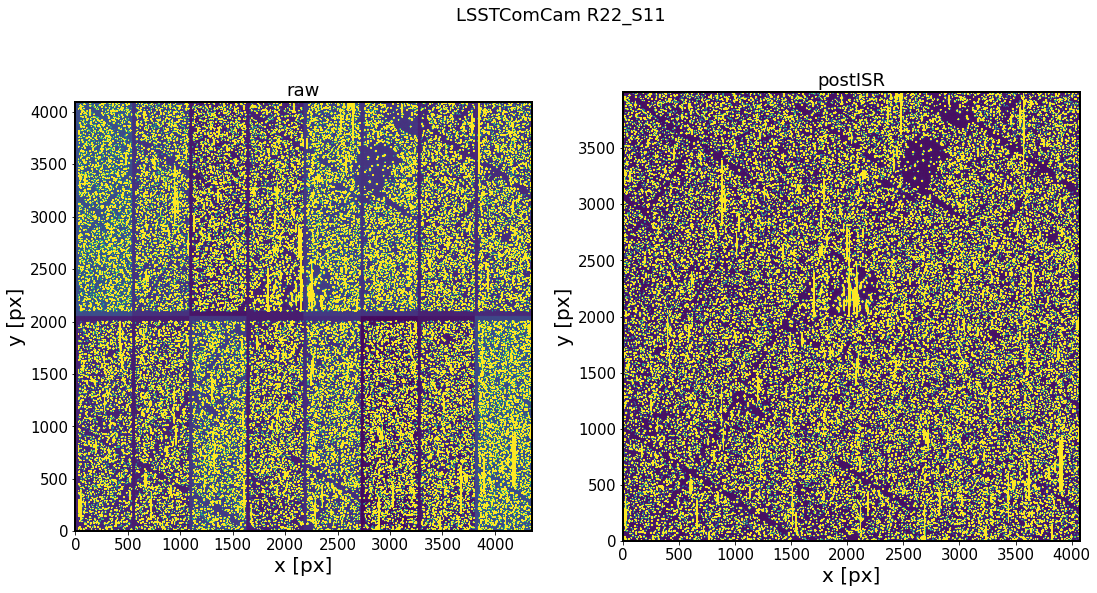

In [51]:
instrument = 'LSSTComCam'
repo_dir = '/project/scichris/aos/ps1_phosim/comCam/Baade/focal/DATA/'
detector='R22_S11'
butler = dafButler.Butler(repo_dir, collections=[f'{instrument}/raw/all',
                                                 f'{instrument}/calib','run1',
                                                 f'{instrument}/calib/unbounded'],
                         )


# this is just to get the exposure  number
# so that we don't have  to guess...
dataId0 = dict(instrument=instrument)
dataset = next(iter(
                    butler.registry.queryDatasets(
                        datasetType='postISRCCD', 
                        collections=['run1'],
                        dataId=dataId0  )
                    )
               )
exp_num = dataset.dataId["exposure"]
print(exp_num)
zscale = ZScaleInterval()

# initialize the figure 
fig,ax = plt.subplots(1,2,figsize=(18,9))

# get the raw exposure 
exposure = butler.get('raw', detector=detector, instrument=instrument,
          exposure=exp_num,)

data = exposure.image.array
vmin, vmax = zscale.get_limits(data)
print(vmin,vmax)
ax[0].imshow(exposure.image.array, vmin=vmin,vmax=vmax,#
             #cmap='Greys',
            origin='lower')

ax[0].set_title("raw")
ax[0].set_xlabel('x [px]')
ax[0].set_ylabel('y [px]')

# get the postISR exposure 
exposure = butler.get('postISRCCD', detector=detector, instrument=instrument,
          exposure=exp_num,collections=['run1'])

data = exposure.image.array
vmin, vmax = zscale.get_limits(data)
print(vmin,vmax)
ax[1].imshow(exposure.image.array, vmin=vmin,vmax=vmax,#cmap='Greys',
            origin='lower')

ax[1].set_title("postISR")
ax[1].set_xlabel('x [px]')
ax[1].set_ylabel('y [px]')
fig.suptitle(f"{instrument} {exposure.getDetector().getName()}",
            fontsize=18)

<ipython-input-52-9cea02cb071d>:2: RuntimeWarning: invalid value encountered in log10
  plt.hist(np.log10(x),)# range=(100,1000))


(array([  71441.,   71380.,       0., 1068530., 4932757., 4661325.,
        1868033.,  979643.,  684459.,  186081.]),
 array([-2.249285  , -1.5276562 , -0.8060274 , -0.08439863,  0.63723016,
         1.358859  ,  2.0804877 ,  2.8021164 ,  3.5237453 ,  4.245374  ,
         4.967003  ], dtype=float32),
 <BarContainer object of 10 artists>)

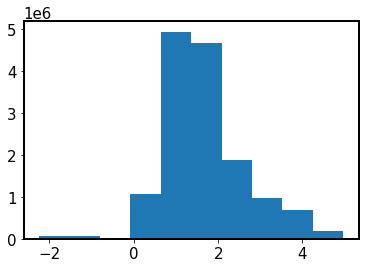

In [52]:
x = np.ravel(exposure.image.array)
plt.hist(np.log10(x),)# range=(100,1000))

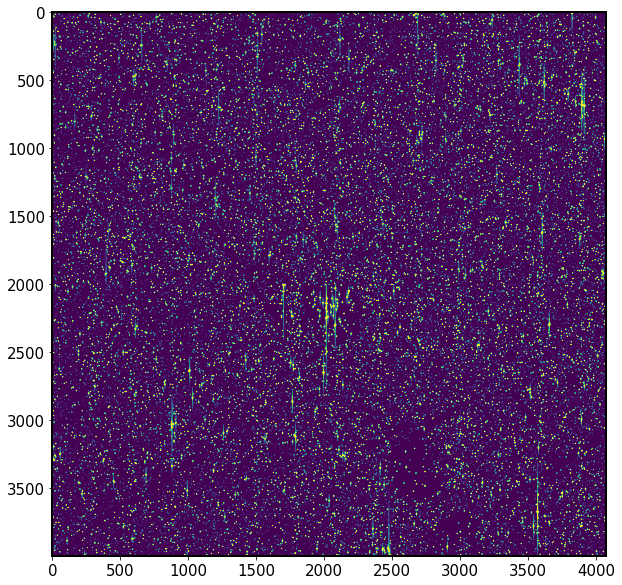

In [62]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
plt.imshow(exposure.image.array,vmin=100,vmax=10500)#max=3.5)

# Show the test data for lsstCam (short exposure 1 sec)


Note: this one was using wrong gain values, that has since been corrected .... 

4021123106002


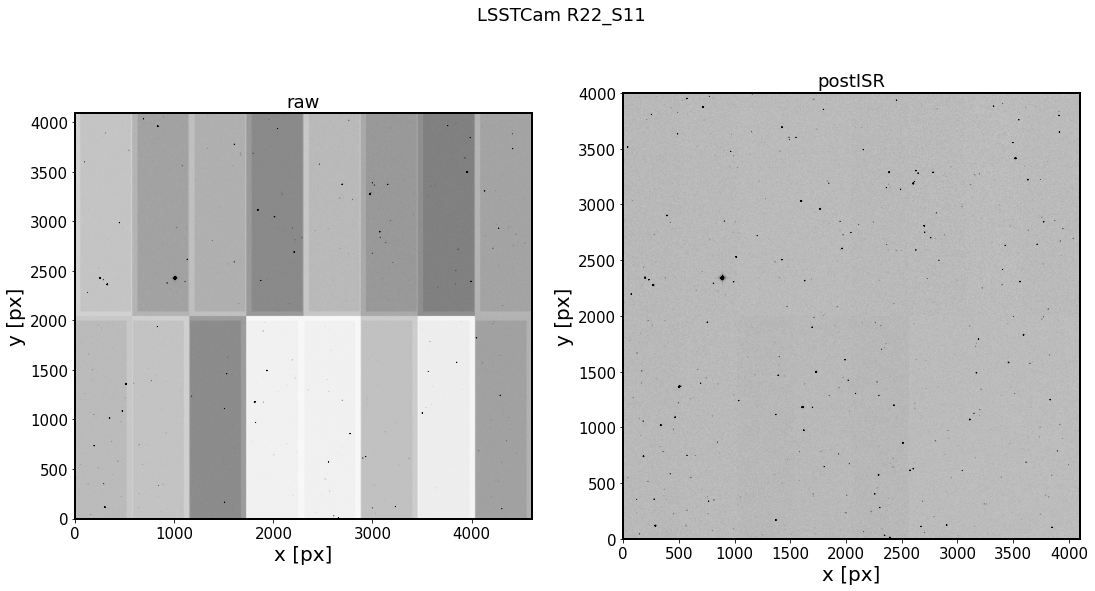

In [28]:
%matplotlib inline

instrument = 'LSSTCam'
repo_dir = '/project/scichris/aos/ps1_phosim/test_lsstCam/high/inFocus/DATA/'
plot_raw_postISR(repo_dir,instrument)   

In [33]:


def plot_corner_rafts(repo_dir, instrument='LSSTCam'):

    afwDisplay.setDefaultBackend("matplotlib")

    # need to specify the calib collections to be able to access the camera 

    butler = dafButler.Butler(repo_dir, collections=[f'{instrument}/raw/all',
                                                     f'{instrument}/calib','run1',
                                                     f'{instrument}/calib/unbounded']
                             )

    dataId0 = dict(instrument=instrument)
    dataset = next(iter(
                        butler.registry.queryDatasets(
                            datasetType='postISRCCD', 
                            collections=['run1'],
                            dataId=dataId0  )
                        )
                   )

    exposure = dataset.dataId["exposure"]

    camera  = butler.get("camera", instrument=instrument, exposure=exposure)


    fig = plt.figure(figsize=(10,10))
    fig.subplots_adjust(hspace=0.2, wspace=0.0, )

    disp = afwDisplay.Display(fig)
    disp.scale('asinh', 'zscale', Q=2)

    disp.setImageColormap('viridis' if True else 'gray')
    dataType = "postISRCCD"

    detectorNameLists = [['R40_SW0', 'R40_SW1'],
                         ['R44_SW0', 'R44_SW1'],
                         ['R00_SW0', 'R00_SW1'],
                         ['R04_SW0', 'R04_SW1']
                        ]
    i = 1
    for detectorNameList in detectorNameLists:

        ax = fig.add_subplot(2, 2, i)

        raftName = detectorNameList[0][:3]
        mos = cameraGeomUtils.showCamera(camera,
                                     cameraGeomUtils.ButlerImage(butler, dataType, 
                                                                 instrument=instrument, 
                                                                 exposure=exposure,
                                                                 verbose=True),
                                     binSize=16, 
                                     detectorNameList=detectorNameList, 
                                     display=disp, overlay=True,
                                     title=raftName,)
        disp.show_colorbar(False)
        ax.axis("off")

        i += 1 


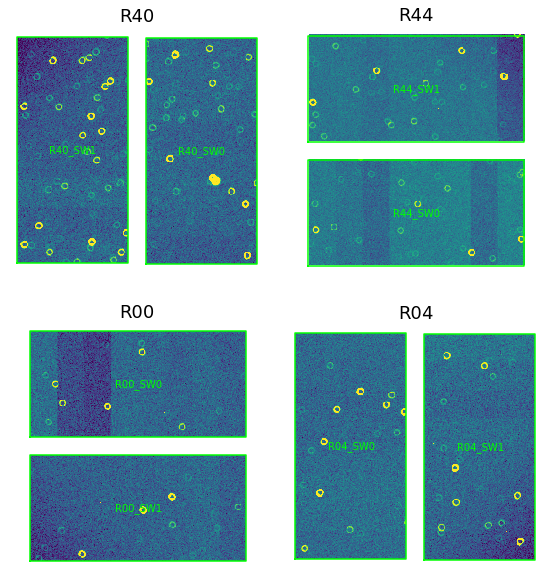

In [34]:

instrument = 'LSSTCam'
#repo_dir = '/project/scichris/aos/images/cornerSensors/arrowsLetters/DATA/'
repo_dir = '/project/scichris/aos/ps1_phosim/test_lsstCam/high/inFocus/DATA/'
plot_corner_rafts(repo_dir, instrument)

# Compare to WCS 

In [9]:
import numpy as np
import os
import pandas as pd
from lsst.obs.base import (bboxFromIraf, MakeRawVisitInfoViaObsInfo, 
createInitialSkyWcs, createInitialSkyWcsFromBoresight)
import lsst.geom

from lsst.daf import butler as dafButler
import lsst.afw.cameraGeom.utils as cameraGeomUtils
import lsst.afw.display as afwDisplay

import matplotlib.pyplot as plt
from astropy.visualization import ZScaleInterval
zscale = ZScaleInterval()
from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

Using /project/scichris/aos/ps1_phosim/comCam/med/focal/DATA


Text(0, 0.5, 'y [px]')

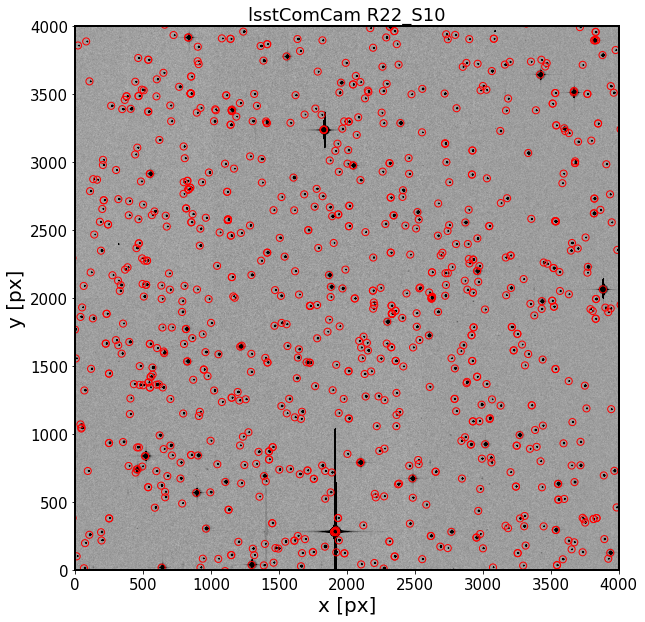

In [13]:
%matplotlib inline

root_dir = '/project/scichris/aos/ps1_phosim/comCam/med/focal/'
instrument = 'LSSTComCam'
repo_name = 'DATA'
repo_dir = os.path.join(root_dir,repo_name)

print(f'Using {repo_dir}')
butler = dafButler.Butler(repo_dir, collections=[f'{instrument}/raw/all',
                                                 f'{instrument}/calib','run1',
                                                 f'{instrument}/calib/unbounded']
                         )
# this is just to get the exposure  number
# so that we don't have  to guess...
dataId0 = dict(instrument=instrument)
dataset = next(iter(
                    butler.registry.queryDatasets(
                        datasetType='postISRCCD', 
                        collections=['run1'],
                        dataId=dataId0  )
                    )
               )
exp_num = dataset.dataId["exposure"]

    
exposure = butler.get('postISRCCD', detector='R22_S10', instrument=instrument,
          exposure=exp_num,collections=['run1'])



# read in the input instance catalog 
cat = np.genfromtxt('/project/scichris/aos/ps1_phosim/stars_comCam_PS1_med_focal.inst',
                        skip_header=16)

cat_df = pd.DataFrame(cat[:, 1:5], columns=['id', 'ra', 'dec', 'g'])

wcs = exposure.getWcs()

x_pix_list = []
y_pix_list = []
for i in range(len(cat_df)):
    x_pix, y_pix = wcs.skyToPixel(
        lsst.geom.SpherePoint(
            cat_df.iloc[i]['ra'], cat_df.iloc[i]['dec'], lsst.geom.degrees
        )
    )
    x_pix_list.append(x_pix)
    y_pix_list.append(y_pix)
    

# obtain the postISR metadata from the exposure 
postIsr_md = exposure.getMetadata()
postIsr_visit_info = postIsr_md.keys()
postIsr_md['RA_DEG'], postIsr_md['DEC_DEG'], postIsr_md['ROTANG']


# get the WCS using the input ROTANG 
pointing_loc = lsst.geom.SpherePoint(postIsr_md['RA_DEG'], postIsr_md['DEC_DEG'], lsst.geom.degrees)
new_wcs = createInitialSkyWcsFromBoresight(pointing_loc, 
                                           (postIsr_md['ROTANG'])*lsst.geom.degrees,
                                           exposure.getDetector(),
                                           flipX=False)


# calculate the position given the x,y 
new_x_pix_list = []
new_y_pix_list = []

for i in range(len(cat_df)):
    x_pix, y_pix = new_wcs.skyToPixel(
        lsst.geom.SpherePoint(
            cat_df.iloc[i]['ra'], cat_df.iloc[i]['dec'], lsst.geom.degrees
        )
    )
    new_x_pix_list.append(x_pix)
    new_y_pix_list.append(y_pix)
    

# plot the WCS-inferred stellar position on top of the data 
data = exposure.image.array
vmin, vmax = zscale.get_limits(data)

fig = plt.figure(figsize=(10,10))
plt.imshow(data, vmin=vmin,vmax=vmax,cmap='Greys')
plt.scatter(new_x_pix_list, new_y_pix_list,  facecolors='none', edgecolors='r', marker='o',s=50, )
plt.xlim(0, 4000)
plt.ylim(0, 4000)
plt.title(f"lsstComCam {exposure.getDetector().getName()}")
plt.xlabel('x [px]')
plt.ylabel('y [px]')


In [11]:
exposure.getWcs()

FITS standard SkyWcs:
Sky Origin: (233.017336, -4.447088)
Pixel Origin: (6261.5, 2000.5)
Pixel Scale: 0.2 arcsec/pixel

In [12]:
createInitialSkyWcsFromBoresight(pointing_loc, 
                                           (postIsr_md['ROTANG'])*lsst.geom.degrees,
                                           exposure.getDetector(),
                                           flipX=False)

FITS standard SkyWcs:
Sky Origin: (233.017336, -4.447088)
Pixel Origin: (6261.5, 2000.5)
Pixel Scale: 0.2 arcsec/pixel

### Use `exposure.getWcs()` instead 

Using /project/scichris/aos/ps1_phosim/comCam/med/focal/DATA


Text(0, 0.5, 'y [px]')

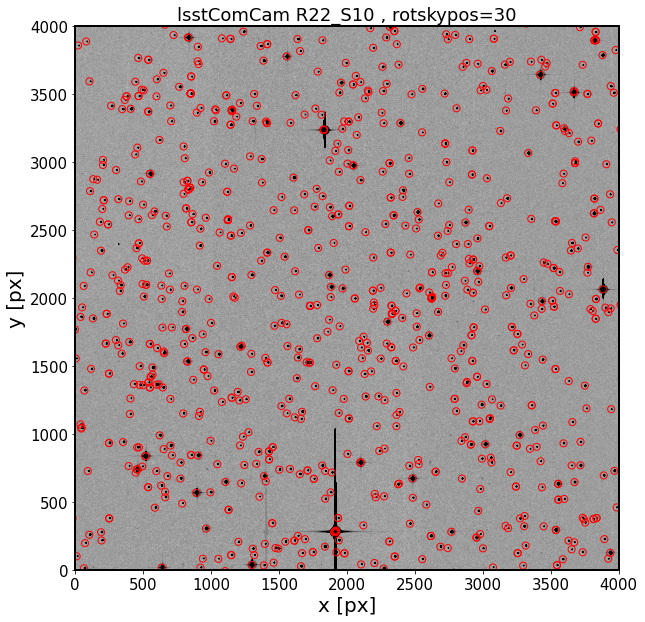

In [9]:
%matplotlib inline

root_dir = '/project/scichris/aos/ps1_phosim/comCam/med/focal/'
instrument = 'LSSTComCam'
repo_name = 'DATA'
repo_dir = os.path.join(root_dir,repo_name)

print(f'Using {repo_dir}')
butler = dafButler.Butler(repo_dir, collections=[f'{instrument}/raw/all',
                                                 f'{instrument}/calib','run1',
                                                 f'{instrument}/calib/unbounded']
                         )
# this is just to get the exposure  number
# so that we don't have  to guess...
dataId0 = dict(instrument=instrument)
dataset = next(iter(
                    butler.registry.queryDatasets(
                        datasetType='postISRCCD', 
                        collections=['run1'],
                        dataId=dataId0  )
                    )
               )
exp_num = dataset.dataId["exposure"]

    
exposure = butler.get('postISRCCD', detector='R22_S10', instrument=instrument,
          exposure=exp_num,collections=['run1'])



# read in the input instance catalog 
cat = np.genfromtxt('/project/scichris/aos/ps1_phosim/stars_comCam_PS1_med_focal.inst',
                        skip_header=16)

cat_df = pd.DataFrame(cat[:, 1:5], columns=['id', 'ra', 'dec', 'g'])


# get the wcs 
wcs = exposure.getWcs()

# calculate the position given the x,y 
x,y = wcs.skyToPixelArray(cat_df['ra'], cat_df['dec'],degrees=True)


########### CHANGE ROTANG 
###########

# obtain the postISR metadata from the exposure 
postIsr_md = exposure.getMetadata()
postIsr_visit_info = postIsr_md.keys()
postIsr_md['RA_DEG'], postIsr_md['DEC_DEG'], postIsr_md['ROTANG']


# get the WCS using the input ROTANG 
pointing_loc = lsst.geom.SpherePoint(postIsr_md['RA_DEG'], postIsr_md['DEC_DEG'], lsst.geom.degrees)
new_wcs = createInitialSkyWcsFromBoresight(pointing_loc, 
                                           (180-postIsr_md['ROTANG'])*lsst.geom.degrees,
                                           exposure.getDetector(),
                                           flipX=False)


# calculate the position given the x,y 
new_x = []
new_y  = []

for i in range(len(cat_df)):
    x_pix, y_pix = new_wcs.skyToPixel(
        lsst.geom.SpherePoint(
            cat_df.iloc[i]['ra'], cat_df.iloc[i]['dec'], lsst.geom.degrees
        )
    )
    new_x.append(x_pix)
    new_y.append(y_pix)
    
    
    
    
    
# plot the WCS-inferred stellar position on top of the data 
data = exposure.image.array
vmin, vmax = zscale.get_limits(data)

fig = plt.figure(figsize=(10,10))
plt.imshow(data, vmin=vmin,vmax=vmax,cmap='Greys')
plt.scatter(new_x,new_y,  facecolors='none', edgecolors='r', marker='o',s=50, )
plt.xlim(0, 4000)
plt.ylim(0, 4000)
plt.title(f"lsstComCam {exposure.getDetector().getName()} , rotskypos=30")
plt.xlabel('x [px]')
plt.ylabel('y [px]')


Copy Bryce's notebook from epyc to LSP and run it here : 

    
    scp -rp suberlak@epyc.astro.washington.edu:/epyc/users/brycek/Commissioning/aos/notebooks/Gen3AOS-LSSTCam-Rot30.ipynb  .

Check out `ROTANG`, `ROTPA`, `ROTSTART`: 

In [29]:
from astropy.io import fits
fpath = os.path.join('/project/scichris/aos/ps1_phosim/comCam/med/focal/DATA/LSSTComCam/raw/all/raw/20211231/CC_H_20211231_006002/raw_LSSTComCam_r_03_CC_H_20211231_006002_R22_S00_LSSTComCam_raw_all.fits')
hdul = fits.open(fpath)

In [35]:
from astropy.io import fits
import os
fpath = os.path.join('/project/scichris/aos/ps1_phosim/comCam/med/focal/DATA/LSSTComCam/raw/all/raw/20211231/CC_H_20211231_006002/raw_LSSTComCam_r_03_CC_H_20211231_006002_R22_S00_LSSTComCam_raw_all.fits')
hdul = fits.open(fpath)
for key in [ 'ROTPA', 'ROTSTART']:
    print(key,hdul[0].header[key])
    
print('ROTANG',hdul[1].header['ROTANG'])

ROTPA 90.0
ROTSTART 90.0
ROTANG 90.0


In [ ]:
Try to use his method

(0.0, 4000.0)

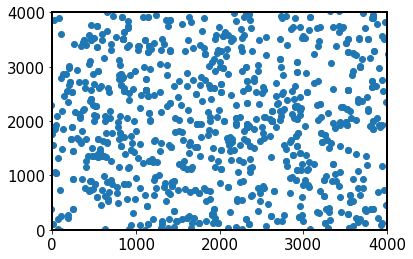

In [26]:
plt.scatter(x,y)
plt.xlim(0, 4000)
plt.ylim(0, 4000)

In [ ]:
### Aside: Show the letter F : do we have the same orientation? 


%matplotlib inline

instrument = 'LSSTCam'
repo_dir = '/project/scichris/aos/images/lsstCam/letter_R22/DATA/'
plot_raw_postISR(repo_dir,instrument)  

## Simulate high-latitude field, `ROTSKYPOS=30` 

Files in /project/scichris/aos/ps1_phosim/test_rotang/:
    
    stars_comCam_PS1_high_focal_rotskypos_30.inst  
    stars_comCam_PS1_high_focal_rottelpos_30.inst
    
    

In [ ]:
    ssh scichris@lsst-login01.ncsa.illinois.edu 
    ssh lsst-devl03  / lsst-devl01 
    
    source "/software/lsstsw/stack/loadLSST.bash"
    setup lsst_distrib
    setup -k -r /project/scichris/aos/phosim_utils/

ROTSKYPOS = 30 


python /project/scichris/aos/phosim_syseng4/phosim.py /project/scichris/aos/ps1_phosim/test_rotang/stars_comCam_PS1_high_focal_rotskypos_30.inst -i comcam -e 1 -c /project/scichris/aos/ps1_phosim/noBkgnd.cmd -p 24 -w /project/scichris/aos/ps1_phosim/test_rotang/rotskypos -s R22_S01 -o /project/scichris/aos/ps1_phosim/test_rotang/rotskypos/raw > /project/scichris/aos/ps1_phosim/test_rotang/rotskypos/starPhoSim.log 2>&1

In [1]:
out_dir = "/project/scichris/aos/ps1_phosim/test_rotang/rotskypos/raw"
instr='comcam'
repackaged_dir = "/project/scichris/aos/ps1_phosim/test_rotang/rotskypos/repackaged"
command = f"phosim_repackager.py {out_dir} \
    --out_dir {repackaged_dir} --inst {instr}"
print(f"\nRunning via subprocess: \n {command}\n")


Running via subprocess: 
 phosim_repackager.py /project/scichris/aos/ps1_phosim/test_rotang/rotskypos/raw     --out_dir /project/scichris/aos/ps1_phosim/test_rotang/rotskypos/repackaged --inst comcam



NB: this repackages changing the original ROTANG to ROTANG+90... 

Using /project/scichris/aos/ps1_phosim/test_rotang/rotskypos/DATA/


Text(0, 0.5, 'y [px]')

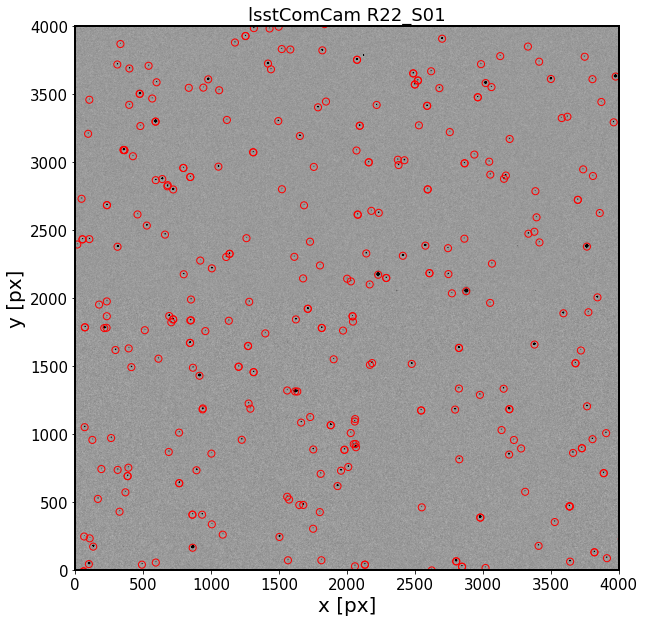

In [1]:
import numpy as np
import os
import pandas as pd
from lsst.obs.base import (bboxFromIraf, MakeRawVisitInfoViaObsInfo, 
createInitialSkyWcs, createInitialSkyWcsFromBoresight)
import lsst.geom

from lsst.daf import butler as dafButler
import lsst.afw.cameraGeom.utils as cameraGeomUtils
import lsst.afw.display as afwDisplay

import matplotlib.pyplot as plt
from astropy.visualization import ZScaleInterval
zscale = ZScaleInterval()
from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

%matplotlib inline

repo_dir = '/project/scichris/aos/ps1_phosim/test_rotang/rotskypos/DATA/'
instrument = 'LSSTComCam'
inst_file = '/project/scichris/aos/ps1_phosim/test_rotang/stars_comCam_PS1_high_focal_rotskypos_30.inst'
detector = 'R22_S01'

print(f'Using {repo_dir}')
butler = dafButler.Butler(repo_dir, collections=[f'{instrument}/raw/all',
                                                 f'{instrument}/calib','run1',
                                                 f'{instrument}/calib/unbounded']
                         )
# this is just to get the exposure  number
# so that we don't have  to guess...
dataId0 = dict(instrument=instrument)
dataset = next(iter(
                    butler.registry.queryDatasets(
                        datasetType='postISRCCD', 
                        collections=['run1'],
                        dataId=dataId0  )
                    )
               )
exp_num = dataset.dataId["exposure"]

    
exposure = butler.get('postISRCCD', detector=detector, instrument=instrument,
          exposure=exp_num,collections=['run1'])



# read in the input instance catalog 
cat = np.genfromtxt(inst_file, skip_header=16)

cat_df = pd.DataFrame(cat[:, 1:5], columns=['id', 'ra', 'dec', 'g'])


# get the wcs 
wcs = exposure.getWcs()

# calculate the position given the x,y 
x,y = wcs.skyToPixelArray(cat_df['ra'], cat_df['dec'],degrees=True)


########### CHANGE ROTANG 
###########

# obtain the postISR metadata from the exposure 
postIsr_md = exposure.getMetadata()
postIsr_visit_info = postIsr_md.keys()
postIsr_md['RA_DEG'], postIsr_md['DEC_DEG'], postIsr_md['ROTANG']


# get the WCS using the input ROTANG 
pointing_loc = lsst.geom.SpherePoint(postIsr_md['RA_DEG'], postIsr_md['DEC_DEG'], lsst.geom.degrees)
new_wcs = createInitialSkyWcsFromBoresight(pointing_loc, 
                                           (180-postIsr_md['ROTANG'])*lsst.geom.degrees,
                                           exposure.getDetector(),
                                           flipX=False)


# calculate the position given the x,y 
new_x = []
new_y  = []

for i in range(len(cat_df)):
    x_pix, y_pix = new_wcs.skyToPixel(
        lsst.geom.SpherePoint(
            cat_df.iloc[i]['ra'], cat_df.iloc[i]['dec'], lsst.geom.degrees
        )
    )
    new_x.append(x_pix)
    new_y.append(y_pix)
    
    
    

# plot the WCS-inferred stellar position on top of the data 
data = exposure.image.array
vmin, vmax = zscale.get_limits(data)

fig = plt.figure(figsize=(10,10))
plt.imshow(data, vmin=vmin,vmax=vmax,cmap='Greys')
plt.scatter(new_x,new_y,  facecolors='none', edgecolors='r', marker='o',s=50, )
plt.xlim(0, 4000)
plt.ylim(0, 4000)
plt.title(f"lsstComCam {exposure.getDetector().getName()}")
plt.xlabel('x [px]')
plt.ylabel('y [px]')


If it used the native WCS it would be wrong: 

Using /project/scichris/aos/ps1_phosim/test_rotang/rotskypos/DATA/


Text(0, 0.5, 'y [px]')

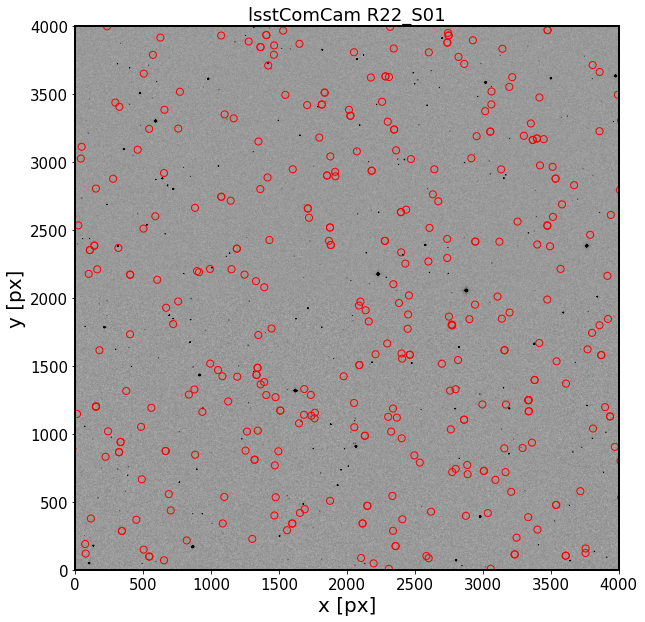

In [109]:
import numpy as np
import os
import pandas as pd
from lsst.obs.base import (bboxFromIraf, MakeRawVisitInfoViaObsInfo, 
createInitialSkyWcs, createInitialSkyWcsFromBoresight)
import lsst.geom

from lsst.daf import butler as dafButler
import lsst.afw.cameraGeom.utils as cameraGeomUtils
import lsst.afw.display as afwDisplay

import matplotlib.pyplot as plt
from astropy.visualization import ZScaleInterval
zscale = ZScaleInterval()
from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

%matplotlib inline

repo_dir = '/project/scichris/aos/ps1_phosim/test_rotang/rotskypos/DATA/'
instrument = 'LSSTComCam'
inst_file = '/project/scichris/aos/ps1_phosim/test_rotang/stars_comCam_PS1_high_focal_rotskypos_30.inst'
detector = 'R22_S01'

print(f'Using {repo_dir}')
butler = dafButler.Butler(repo_dir, collections=[f'{instrument}/raw/all',
                                                 f'{instrument}/calib','run1',
                                                 f'{instrument}/calib/unbounded']
                         )
# this is just to get the exposure  number
# so that we don't have  to guess...
dataId0 = dict(instrument=instrument)
dataset = next(iter(
                    butler.registry.queryDatasets(
                        datasetType='postISRCCD', 
                        collections=['run1'],
                        dataId=dataId0  )
                    )
               )
exp_num = dataset.dataId["exposure"]

    
exposure = butler.get('postISRCCD', detector=detector, instrument=instrument,
          exposure=exp_num,collections=['run1'])



# read in the input instance catalog 
cat = np.genfromtxt(inst_file, skip_header=16)

cat_df = pd.DataFrame(cat[:, 1:5], columns=['id', 'ra', 'dec', 'g'])

#########################
# Use the original WCS 
#########################

# get the wcs 
wcs = exposure.getWcs()

# calculate the position given the x,y 
x,y = wcs.skyToPixelArray(cat_df['ra'], cat_df['dec'],degrees=True)    
    

# plot the WCS-inferred stellar position on top of the data 
data = exposure.image.array
vmin, vmax = zscale.get_limits(data)

fig = plt.figure(figsize=(10,10))
plt.imshow(data, vmin=vmin,vmax=vmax,cmap='Greys')
plt.scatter(x,y,  facecolors='none', edgecolors='r', marker='o',s=50, )
plt.xlim(0, 4000)
plt.ylim(0, 4000)
plt.title(f"lsstComCam {exposure.getDetector().getName()}")
plt.xlabel('x [px]')
plt.ylabel('y [px]')



In [ ]:
hdul = fits.open('')

Repackage with corrected `phosim_repackager`,  i.e. 

    ROTANG = 90 - PHOSIM_ROTANG 

    phosim_repackager.py /project/scichris/aos/ps1_phosim/test_rotang/rotskypos/raw     --out_dir /project/scichris/aos/ps1_phosim/test_rotang/rotskypos/repackaged2 --inst comcam


Ingest and run the ISR ...



Using /project/scichris/aos/ps1_phosim/test_rotang/rotskypos/DATA2/


Text(0, 0.5, 'y [px]')

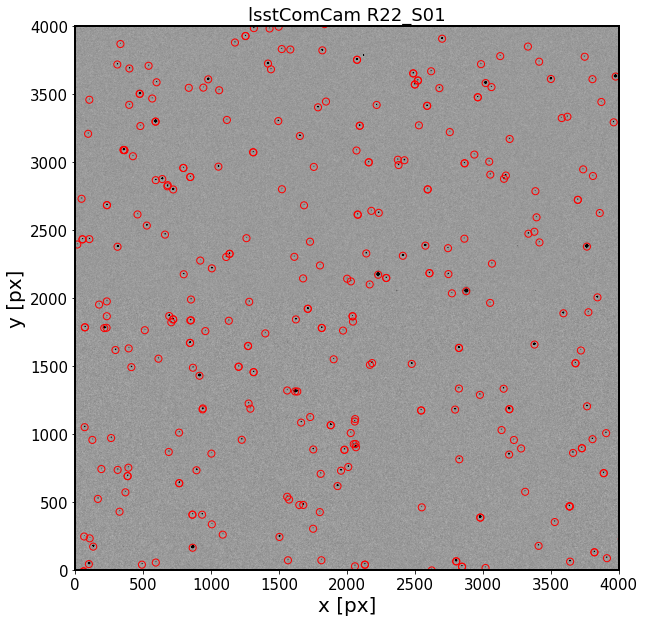

In [111]:
import numpy as np
import os
import pandas as pd
from lsst.obs.base import (bboxFromIraf, MakeRawVisitInfoViaObsInfo, 
createInitialSkyWcs, createInitialSkyWcsFromBoresight)
import lsst.geom

from lsst.daf import butler as dafButler
import lsst.afw.cameraGeom.utils as cameraGeomUtils
import lsst.afw.display as afwDisplay

import matplotlib.pyplot as plt
from astropy.visualization import ZScaleInterval
zscale = ZScaleInterval()
from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

%matplotlib inline

repo_dir = '/project/scichris/aos/ps1_phosim/test_rotang/rotskypos/DATA2/'
instrument = 'LSSTComCam'
inst_file = '/project/scichris/aos/ps1_phosim/test_rotang/stars_comCam_PS1_high_focal_rotskypos_30.inst'
detector = 'R22_S01'

print(f'Using {repo_dir}')
butler = dafButler.Butler(repo_dir, collections=[f'{instrument}/raw/all',
                                                 f'{instrument}/calib','run1',
                                                 f'{instrument}/calib/unbounded']
                         )
# this is just to get the exposure  number
# so that we don't have  to guess...
dataId0 = dict(instrument=instrument)
dataset = next(iter(
                    butler.registry.queryDatasets(
                        datasetType='postISRCCD', 
                        collections=['run1'],
                        dataId=dataId0  )
                    )
               )
exp_num = dataset.dataId["exposure"]

    
exposure = butler.get('postISRCCD', detector=detector, instrument=instrument,
          exposure=exp_num,collections=['run1'])



# read in the input instance catalog 
cat = np.genfromtxt(inst_file, skip_header=16)

cat_df = pd.DataFrame(cat[:, 1:5], columns=['id', 'ra', 'dec', 'g'])

#########################
# Use the original WCS 
#########################

# get the wcs 
wcs = exposure.getWcs()

# calculate the position given the x,y 
x,y = wcs.skyToPixelArray(cat_df['ra'], cat_df['dec'],degrees=True)    
    

# plot the WCS-inferred stellar position on top of the data 
data = exposure.image.array
vmin, vmax = zscale.get_limits(data)

fig = plt.figure(figsize=(10,10))
plt.imshow(data, vmin=vmin,vmax=vmax,cmap='Greys')
plt.scatter(x,y,  facecolors='none', edgecolors='r', marker='o',s=50, )
plt.xlim(0, 4000)
plt.ylim(0, 4000)
plt.title(f"lsstComCam {exposure.getDetector().getName()}")
plt.xlabel('x [px]')
plt.ylabel('y [px]')



ok, now its correct! 

Check the content of the repackaged FITS file : 

In [112]:
hdul = fits.open('/project/scichris/aos/ps1_phosim/test_rotang/rotskypos/DATA2/\
run1/postISRCCD/20211231/CC_H_20211231_006002/postISRCCD_LSSTComCam_r_03_CC_H_20211231_006002_R22_S01_run1.fits')
hdul[0].header['ROTANG']

60.0

Use astropy  to plot the WCS info 



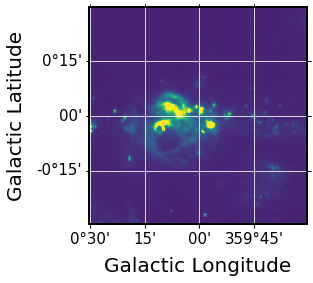

In [65]:
import matplotlib.pyplot as plt

from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

filename = get_pkg_data_filename('galactic_center/gc_msx_e.fits')

hdu = fits.open(filename)[0]
wcs = WCS(hdu.header)

plt.subplot(projection=wcs)
plt.imshow(hdu.data, vmin=-2.e-5, vmax=2.e-4, origin='lower')
plt.grid(color='white', ls='solid')
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')

In [66]:
wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'GLON-CAR'  'GLAT-CAR'  
CRVAL : 0.0  0.0  
CRPIX : 75.907  74.8485  
NAXIS : 149  149

In [75]:
filename = '/project/scichris/aos/ps1_phosim/test_rotang/rotskypos/DATA/\
run1/postISRCCD/20211231/CC_H_20211231_006002/postISRCCD_LSSTComCam_r_03_CC_H_20211231_006002_R22_S01_run1.fits'

hdul = fits.open(filename)
wcs = WCS(hdul[1].header)


In [76]:
wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 197.464413  24.335542  
CRPIX : 2037.5  6226.5  
CD1_1 CD1_2  : 2.77777777777772e-05  4.81125224324715e-05  
CD2_1 CD2_2  : 4.81125224324695e-05  -2.77777777777781e-05  
NAXIS : 4072  4000

In [77]:
#wcs.get_axis_types

In [25]:
hdul = fits.open(filename)

In [93]:
exposure.getWcs?

Docstring: getWcs(self: lsst.afw.image.exposure.ExposureF) -> lsst.afw.geom.SkyWcs
Type:      method


AttributeError: 'lsst.afw.image.exposure._exposure.ExposureF' object has no attribute 'keys'

Using /project/scichris/aos/ps1_phosim/test_rotang/rotskypos/DATA/


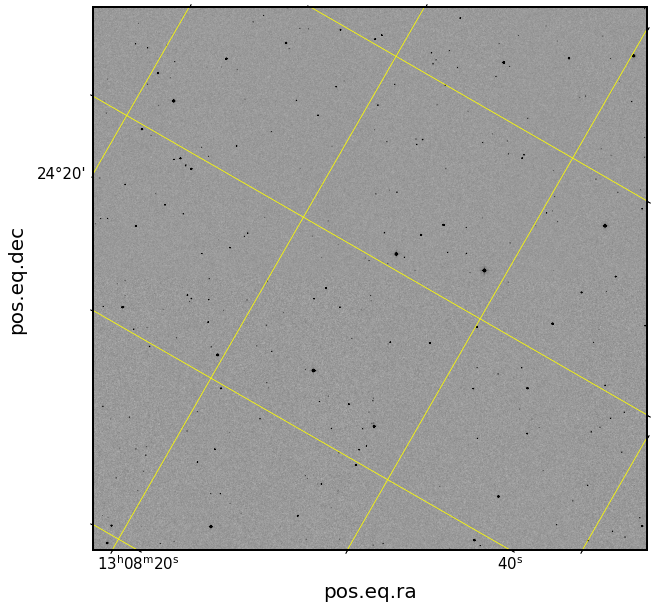

In [107]:
import matplotlib.pyplot as plt

from astropy.wcs import WCS
from astropy.io import fits

# read the wcs for astropy
filename = os.path.join(repo_dir, 'run1/postISRCCD/20211231/CC_H_20211231_006002',
        'postISRCCD_LSSTComCam_r_03_CC_H_20211231_006002_R22_S01_run1.fits')

hdul = fits.open(filename)
wcs = WCS(hdul[1].header)


# read the full postISR exposure
# ( FITS has each amp in a separate header...)
repo_dir = '/project/scichris/aos/ps1_phosim/test_rotang/rotskypos/DATA/'
instrument = 'LSSTComCam'
detector = 'R22_S01'

print(f'Using {repo_dir}')
butler = dafButler.Butler(repo_dir, collections=[f'{instrument}/raw/all',
                                                 f'{instrument}/calib','run1',
                                                 f'{instrument}/calib/unbounded']
                         )
# this is just to get the exposure  number
# so that we don't have  to guess...
dataId0 = dict(instrument=instrument)
dataset = next(iter(
                    butler.registry.queryDatasets(
                        datasetType='postISRCCD', 
                        collections=['run1'],
                        dataId=dataId0  )
                    )
               )
exp_num = dataset.dataId["exposure"]

exposure = butler.get('postISRCCD', detector=detector, instrument=instrument,
          exposure=exp_num,collections=['run1'])

data = exposure.image.array
vmin, vmax = zscale.get_limits(data)


# plot the data and the WCS overlay 
fig = plt.figure(figsize=(10,10))
ax = plt.subplot()
ax.imshow(data,  origin='lower', vmin=vmin, vmax=vmax,cmap='Greys')
ax.set_title(detector)

ax.grid(color='white', ls='solid')

ax1 = plt.subplot(projection=wcs)

ax1.grid(color='yellow', ls='solid')
ax1.imshow(data,  origin='lower', vmin=vmin, vmax=vmax,cmap='Greys',)
#ax.set_xlabel('Right Ascension')
#ax.set_ylabel('Declination')

#overlay = ax.get_coords_overlay('rectilinear')


In [116]:
#from lsst.ts.phosim import TeleFacade

In [124]:
intraFocalDirName='intra'
extraFocalDirName='extra'

outputImgDir = 'output'
tmpDirPath = os.path.join(outputImgDir, "tmp")

isEimg = False


#tele = Tele
defocalDistInMm = 1.5
defocalDistInMicrons = int(1000*defocalDistInMm)
for imgType, focusz in zip([intraFocalDirName, extraFocalDirName],
                           
                           [defocalDistInMicrons, -defocalDistInMicrons]
                          ):

    # Repackage the images to the temporary directory
    command = "phosim_repackager.py"
    phosimImgDir = os.path.join(outputImgDir, imgType)
    argstring = "%s --out_dir=%s" % (phosimImgDir, tmpDirPath)
    if isEimg:
        argstring += " --eimage"
    argstring += f" --focusz {focusz}"
    print(command, argstring)
    #runProgram(command, argstring=argstring)

phosim_repackager.py output/intra --out_dir=output/tmp --focusz 1500
phosim_repackager.py output/extra --out_dir=output/tmp --focusz -1500


In [121]:
for a,b in zip()

NameError: name 'focusz' is not defined

## Use cameraGeomUtils here 

Using /project/scichris/aos/ps1_phosim/test_rotang/rotskypos/DATA/


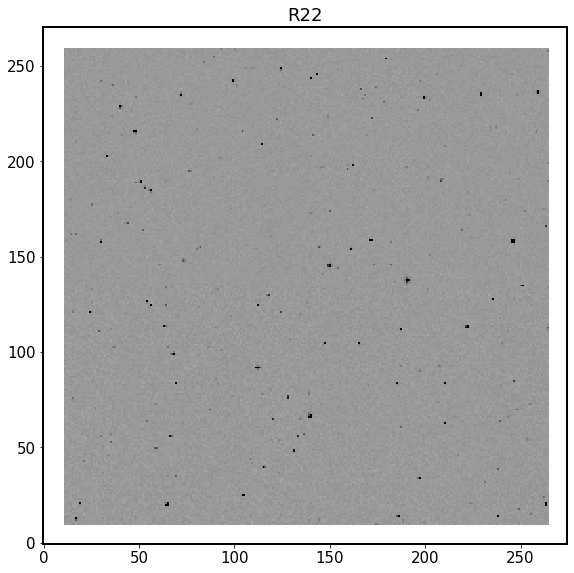

In [63]:
from lsst.daf import butler as dafButler
import lsst.afw.cameraGeom.utils as cameraGeomUtils
import lsst.afw.display as afwDisplay
import matplotlib.pyplot as plt
from matplotlib import rcParams 
from astropy.io import fits
import numpy as np 
import os 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

afwDisplay.setDefaultBackend("matplotlib")

repo_dir = '/project/scichris/aos/ps1_phosim/test_rotang/rotskypos/DATA/'
instrument = 'LSSTComCam'
detector = 'R22_S01'

print(f'Using {repo_dir}')
butler = dafButler.Butler(repo_dir, collections=[f'{instrument}/raw/all',
                                                 f'{instrument}/calib','run1',
                                                 f'{instrument}/calib/unbounded']
                         )
# this is just to find out  the available exposure  number
# so that I don't have  to look in the sqlite table...
dataId0 = dict(instrument=instrument)
dataset = next(iter(
                    butler.registry.queryDatasets(
                        datasetType='postISRCCD', 
                        collections=['run1'],
                        dataId=dataId0  )
                    )
               )

exposure = butler.get('postISRCCD', detector=detector, instrument=instrument,
          exposure=exp_num,collections=['run1'])




exposure_number = dataset.dataId["exposure"]

camera  = butler.get("camera", instrument=instrument, exposure=exposure_number)


fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.2, wspace=0.0, )

disp = afwDisplay.Display(fig)
disp.scale("linear",min=vmin,max=vmax)
disp.setImageColormap('Greys')
dataType = "postISRCCD"

detectorNameList = ['R22_S01'] 
                
ax = fig.add_subplot(1, 1, 1)

raftName = detectorNameList[0][:3]

mos = cameraGeomUtils.showCamera(camera,
                             cameraGeomUtils.ButlerImage(butler, dataType, 
                                                         instrument=instrument, 
                                                         exposure=exposure_number,
                                                         verbose=True),
                             binSize=16, 
                             detectorNameList=detectorNameList, 
                             display=disp, overlay=False,#showWcs=True,
                             title=raftName,)
disp.show_colorbar(False)


In [64]:
disp?

Type:        Display
String form: Display[Figure(720x720)]
File:        /opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-0.5.0/Linux64/afw/21.0.0-31-g2bc2b1e0a+8935f19055/python/lsst/afw/display/interface.py
Docstring:  
Create an object able to display images and overplot glyphs

Parameters
----------
frame
    An identifier for the display
backend : `str`
    The backend to use (defaults to value set by setDefaultBackend())
*args
    Arguments to pass to the backend
**kwargs
    Arguments to pass to the backend


import matplotlib.pyplot as plt

from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

filename = get_pkg_data_filename('galactic_center/gc_msx_e.fits')

hdu = fits.open(filename)[0]
wcs = WCS(hdu.header)

plt.subplot(projection=wcs)
plt.imshow(hdu.data, vmin=-2.e-5, vmax=2.e-4, origin='lower')
plt.grid(color='white', ls='solid')
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')ROTTELPOS = 30

python /project/scichris/aos/phosim_syseng4/phosim.py /project/scichris/aos/ps1_phosim/test_rotang/stars_comCam_PS1_high_focal_rottelpos_30.inst -i comcam -e 1 -c /project/scichris/aos/ps1_phosim/noBkgnd.cmd -p 24 -w /project/scichris/aos/ps1_phosim/test_rotang/rottelpos -s R22_S01 -o /project/scichris/aos/ps1_phosim/test_rotang/rottelpos/raw > /project/scichris/aos/ps1_phosim/test_rotang/rottelpos/starPhoSim.log 2>&1

In [2]:
out_dir = "/project/scichris/aos/ps1_phosim/test_rotang/rottelpos/raw"
instr='comcam'
repackaged_dir = "/project/scichris/aos/ps1_phosim/test_rotang/rottelpos/repackaged"
command = f"phosim_repackager.py {out_dir} \
    --out_dir {repackaged_dir} --inst {instr}"
print(f"\nRunning via subprocess: \n {command}\n")


Running via subprocess: 
 phosim_repackager.py /project/scichris/aos/ps1_phosim/test_rotang/rottelpos/raw     --out_dir /project/scichris/aos/ps1_phosim/test_rotang/rottelpos/repackaged --inst comcam

